
¿Cuáles son los 10 países con la mayor área forestal?
¿Existen diferencias notables en la distribución de la tasa de natalidad entre continentes?
¿Cómo se relacionan el CPI y el precio de la gasolina? Crea un scatter plot que muestre esta relación y agrega una línea para visualizar la tendencia. Ajusta los valores del CPI entre 100 y 300.
¿Cómo varía la esperanza de vida entre los diferentes países de Oceanía? Utiliza un diagrama de violín para representar la distribución de la esperanza de vida en función del idioma oficial de cada país.
Queremos analizar la relación entre la tasa de impuestos total, el PIB per cápita y la tasa de alfabetización. Crea un conjunto de subplots con tres gráficas:
Un scatter plot que muestre la relación entre el PIB per cápita y el CPI.
Un histograma de la tasa de impuestos total.
Un gráfico de barras que resuma la tasa de impuestos total por continente.
Requisitos que deben cumplir las gráficas:
Todas deben llevar título.
Los nombres de los ejes deben estar en castellano.
En los scatterplot los puntos deben tener un tamaño de 2.
En los scatterplot los puntos deben tener un color diferente al azul.
En los barplot las barras siempre tienen que estar ordenadas de mayor a menor.
En los barplot y countplot las barras tienen que tener un color diferente a los que vienen por defecto.
En los pieplot los quesitos deben tener unos colores diferentes a los que vienen por defecto.
En los pieplot siempre tenemos que añadir la etiqueta de a que % corresponde cada quesito.
En los pieplot el tamaño de los % tiene que ser de 6.

In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

1 ¿Cómo se distribuye la tasa de natalidad en el conjunto de datos? ¿Hay algún patrón evidente?

In [2]:
df= pd.read_csv("continentes_sin_nulos.csv", index_col=0)
df.head(5)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,longitud,latitud,continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.90,9.3,33.939110,67.709953,Asia,0.70,64.500000,652230.0,323000.0,32.49,93.0,8672.0,149.900,2.30,4.47,1.910135e+10,9.70,47.9,638.0,0.43,78.4,38041754.0,71.40,11.120,9797273.0
1,Albania,105,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europe,1.36,78.500000,28748.0,9000.0,11.78,355.0,4536.0,119.050,1.40,1.62,1.527808e+10,55.00,7.8,15.0,1.12,56.9,2854191.0,36.60,12.330,1747593.0
2,Algeria,18,DZ,17.4,Algiers,DZD,0.8,109.9,Algiers,Arabic,41.20,37.2,28.033886,1.659626,Africa,0.28,76.700000,2381741.0,317000.0,24.28,213.0,150006.0,151.360,2.00,3.02,1.699882e+11,51.40,20.1,112.0,0.95,28.1,43053054.0,66.10,11.700,31510100.0
3,Andorra,164,AD,40.0,Andorra la Vella,EUR,34.0,106.4,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europe,1.51,80.442372,468.0,10800.0,7.20,376.0,469.0,169.706,6.82,1.27,3.154058e+09,9.82,2.7,436.8,6.63,36.4,77142.0,34.84,8.058,67873.0
4,Angola,26,AO,47.5,Luanda,AOA,46.3,113.5,Luanda,Portuguese,77.50,9.2,-11.202692,17.873887,Africa,0.97,60.800000,1246700.0,117000.0,40.73,244.0,34693.0,261.730,17.10,5.52,9.463542e+10,9.30,51.6,241.0,0.71,33.4,31825295.0,49.10,6.890,21061025.0


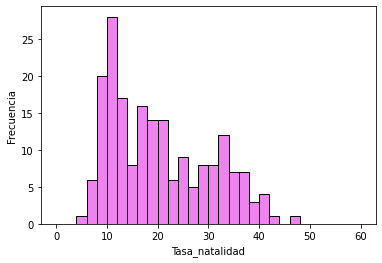

In [3]:
# replicamos la última gráfica que hemos hecho
plt.hist(x = "birthrate_k", 
         data = df, 
         bins = 30, 
         color = "violet", 
         edgecolor = "black", 
         range = [0, 60])

# añadimos el método 'plt.xlabel()' para ponerle nombre al eje x
plt.xlabel("Tasa_natalidad")

# añadimos el método 'plt.ylabel()' para ponerlo nombre al eje y
plt.ylabel("Frecuencia");

2 ¿Existe una relación aparente entre la tasa de mortalidad infantil y la esperanza de vida? Proporciona una breve descripción de los patrones que observes.

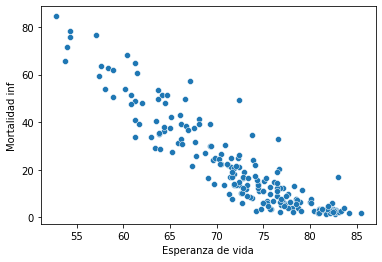

In [4]:
# como ya lo hemos aprendido, vamos a cambiar el nombre de los ejes usando los métodos 'plt.xlabel()'  y 'plt.ylabel()' 
sns.scatterplot(x = "lifeexpectancy_i", 
                y = "infantmortality_k", 
                data = df)

# cambiamos los nombres de los ejes
plt.xlabel("Esperanza de vida")
plt.ylabel("Mortalidad inf");

cuanto mayor es la tasa de mortalidad infantil, es menor la esperanza de vida

3¿Cuál es el continente con la mayor cantidad de países en el conjunto de datos? Proporciona el porcentaje de países en ese continente.
África

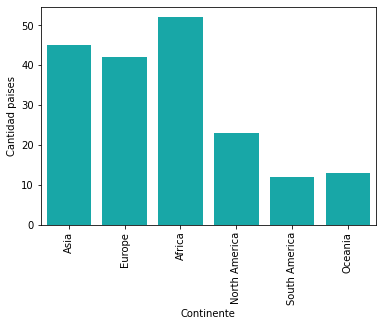

In [5]:
# en este caso hemos añadido el parámetro 'order' para ordenar el nombre de las etiquetas y que aparezcan las barras de mayor cantidad a menor. 
sns.countplot(x = "continent", 
              data = df,
              color = "c")

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Continente")
plt.ylabel("Cantidad paises");

4 ¿Cuál es la mediana de la esperanza de vida en Europa? Proporciona un rango intercuartil aproximado y verifica si existen valores atípicos.

In [6]:
#creamos una variable para que solo nos aparezca la esperanza de vida de Europa
esperanza_europa = df[df["continent"]== "Europe"]
esperanza_europa

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,longitud,latitud,continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
1,Albania,105,AL,43.1,Tirana,ALL,28.1,107.00,Tirana,Albanian,55.70,18.6,41.153332,20.168331,Europe,1.360000,78.500000,28748.0,9000.0,11.780,355.0,4536.0,119.050,1.40,1.620,1.527808e+10,55.00,7.80,15.0,1.120,56.90,2854191.0,36.60,12.330,1747593.0
3,Andorra,164,AD,40.0,Andorra la Vella,EUR,34.0,106.40,Andorra la Vella,Catalan,62.45,16.3,42.506285,1.521801,Europe,1.510000,80.442372,468.0,10800.0,7.200,376.0,469.0,169.706,6.82,1.270,3.154058e+09,9.82,2.70,436.8,6.630,36.40,77142.0,34.84,8.058,67873.0
9,Austria,109,AT,32.4,Vienna,EUR,46.9,103.10,Vienna,German,60.70,25.4,47.516231,14.550072,Europe,1.200000,81.600000,83871.0,21000.0,9.700,43.0,61448.0,118.060,1.50,1.470,4.463147e+11,85.10,2.90,5.0,2.612,17.90,8877067.0,51.40,4.670,5194416.0
15,Belarus,47,BY,42.0,Minsk,BYN,42.6,100.50,Minsk,Russian,64.10,14.7,53.709807,27.953389,Europe,0.600000,74.200000,207600.0,155000.0,9.900,375.0,58280.0,163.306,5.60,1.450,6.308046e+10,87.40,2.60,2.0,1.490,34.50,9466856.0,53.30,4.590,7482982.0
16,Belgium,383,BE,44.6,City of Brussels,EUR,22.6,103.90,Brussels,French,53.60,24.0,50.503887,4.469936,Europe,1.430000,81.600000,30528.0,32000.0,10.300,32.0,96889.0,117.110,1.40,1.620,5.296067e+11,79.70,2.90,5.0,10.310,17.60,11484055.0,55.40,5.590,11259082.0
21,Bosnia and Herzegovina,64,BA,43.1,Sarajevo,BAM,42.7,102.55,Tuzla Canton,Bosnian,46.40,20.4,43.915886,17.679076,Europe,1.050000,77.300000,51197.0,11000.0,8.110,387.0,21848.0,104.900,0.60,1.270,2.004785e+10,23.30,5.00,10.0,1.040,28.60,3301000.0,23.70,18.420,1605144.0
25,Bulgaria,64,BG,46.3,Sofia,BGN,35.4,89.30,Sofia,Bulgarian,55.40,20.2,42.733883,25.485830,Europe,1.110000,74.900000,110879.0,31000.0,8.900,359.0,41708.0,114.420,3.10,1.560,8.600000e+10,71.00,5.90,10.0,1.570,47.70,6975761.0,28.30,4.340,5256027.0
41,Croatia,73,HR,27.6,Zagreb,HRK,34.4,96.50,Zagreb,Croatian,51.20,22.0,45.100000,15.200000,Europe,1.260000,78.100000,56594.0,18000.0,9.000,385.0,17488.0,109.820,0.80,1.470,6.041555e+10,67.90,4.00,8.0,2.920,15.20,4067500.0,20.50,6.930,2328318.0
43,Cyprus,131,CY,12.2,Nicosia,EUR,18.7,99.30,Statos�������,Greek,63.10,24.5,35.126413,33.429859,Europe,1.230000,80.800000,9251.0,16000.0,10.460,357.0,6626.0,102.510,0.30,1.330,2.456465e+10,75.90,1.90,6.0,0.994,43.90,1198575.0,22.40,7.270,800708.0
44,Czech Republic,139,CZ,45.2,Prague,CZK,34.6,100.70,Prague,Czech,60.60,14.9,49.817492,15.472962,Europe,1.170000,79.000000,78867.0,23000.0,10.700,420.0,102218.0,116.480,2.80,1.690,2.464892e+11,64.10,2.70,3.0,3.000,14.80,10669709.0,46.10,1.930,7887156.0


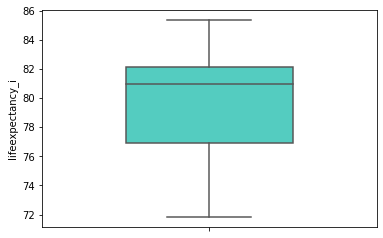

In [7]:
# añadimos un boxplot creado con Seaborn usando el método 'sns.boxplot()'
sns.boxplot(y = "lifeexpectancy_i", 
            data = esperanza_europa,
            width = 0.5, 
            color = "turquoise");
          



In [8]:
df.head(2)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,longitud,latitud,continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.9,9.3,33.939110,67.709953,Asia,0.70,64.5,652230.0,323000.0,32.49,93.0,8672.0,149.90,2.3,4.47,1.910135e+10,9.7,47.9,638.0,0.43,78.4,38041754.0,71.4,11.12,9797273.0
1,Albania,105,AL,43.1,Tirana,ALL,28.1,107.0,Tirana,Albanian,55.7,18.6,41.153332,20.168331,Europe,1.36,78.5,28748.0,9000.0,11.78,355.0,4536.0,119.05,1.4,1.62,1.527808e+10,55.0,7.8,15.0,1.12,56.9,2854191.0,36.6,12.33,1747593.0


5 ¿Existen relaciones visibles entre la tasa de natalidad y las siguientes variables: tasa de mortalidad infantil, esperanza de vida, 
#densidad de población y población urbana? Usa un subplot. Describe cualquier patrón que encuentres.

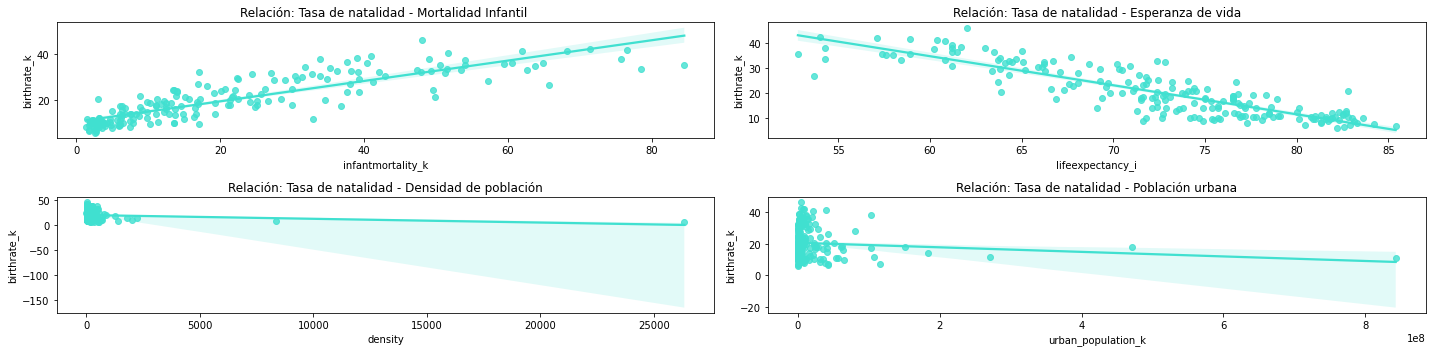

In [9]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 5))
axes = axes.flat


sns.regplot(y = "birthrate_k", 
            x = "infantmortality_k",
            data = df, 
            color = "turquoise", 
            ax = axes[0])


axes[0].set_title("Relación: Tasa de natalidad - Mortalidad Infantil ")


sns.regplot(y = "birthrate_k", 
            x = "lifeexpectancy_i",
            data = df, 
            color = "turquoise", 
            ax = axes[1])


axes[1].set_title("Relación: Tasa de natalidad - Esperanza de vida")


sns.regplot(y = "birthrate_k", 
            x = "density",
            data = df, 
            color = "turquoise", 
            ax = axes[2])

axes[2].set_title("Relación: Tasa de natalidad - Densidad de población")


sns.regplot(y = "birthrate_k", 
            x = "urban_population_k",
            data = df, 
            color = "turquoise", 
            ax = axes[3])

axes[3].set_title("Relación: Tasa de natalidad - Población urbana")
plt.tight_layout();

6 ¿Cuáles son los 10 países con la mayor área forestal?

In [10]:
df.head(1)

,country,density,abbreviation,agriculturalland,capital/majorcity,currency-code,forestedarea,grossprimaryeducationenrollment,largestcity,officiallanguage,populationlaborforceparticipation,taxrevenue,longitud,latitud,continent,gasolineprice_i,lifeexpectancy_i,landarea_k,armedforcessize_k,birthrate_k,callingcode_k,co2-emissions_k,cpi_k,cpichange_k,fertilityrate_k,gdp_k,grosstertiaryeducationenrollment_k,infantmortality_k,maternalmortalityratio_k,minimumwage_k,outofpockethealthexpenditure_k,population_k,totaltaxrate_k,unemploymentrate_k,urban_population_k
0,Afghanistan,60,AF,58.1,Kabul,AFN,2.1,104.0,Kabul,Pashto,48.9,9.3,33.93911,67.709953,Asia,0.7,64.5,652230.0,323000.0,32.49,93.0,8672.0,149.9,2.3,4.47,1.910135e+10,9.7,47.9,638.0,0.43,78.4,38041754.0,71.4,11.12,9797273.0


In [11]:
df_forestedarea  = df[['forestedarea','country']].sort_values(by='forestedarea', ascending=False).head(10)
df_forestedarea


,forestedarea,country
167,98.3,Suriname
111,91.9,Federated States of Micronesia
61,90.0,Gabon
154,88.4,Seychelles
132,87.6,Palau
71,83.9,Guyana
92,82.1,Laos
159,77.9,Solomon Islands
135,74.1,Papua New Guinea
59,73.1,Finland


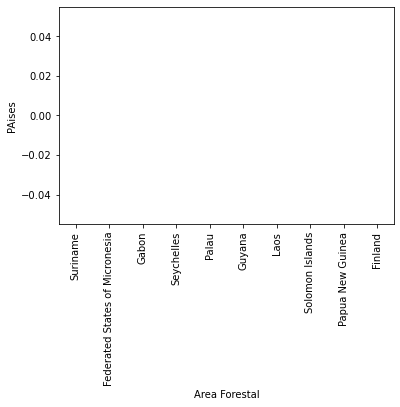

In [12]:
# volvemos a construir la gráfica usando un 'sns.countplot()'
# en este caso hemos añadido el parámetro 'order' para ordenar el nombre de las etiquetas y que aparezcan las barras de mayor cantidad a menor. 
sns.countplot(x = "forestedarea", 
              data = df_forestedarea,
              color = "c", 
              order = ['Suriname', 'Federated States of Micronesia', "Gabon", "Seychelles","Palau", "Guyana", "Laos", "Solomon Islands","Papua New Guinea", "Finland" ])

# giramos las etiquetas del eje "x", en este caso a 90º. En este caso solo vamos a usar el parámetro 'rotation', 
# más adelante veremos mas ejemplos para usar los otros parámetros. 
plt.xticks(rotation = 90)

# cambiamos el nombre de los ejes usando los métodos 'plt.ylabel()' y 'plt.xlabel()' ya que estamos creando solo una gráfica
plt.xlabel("Area Forestal")
plt.ylabel("PAises");

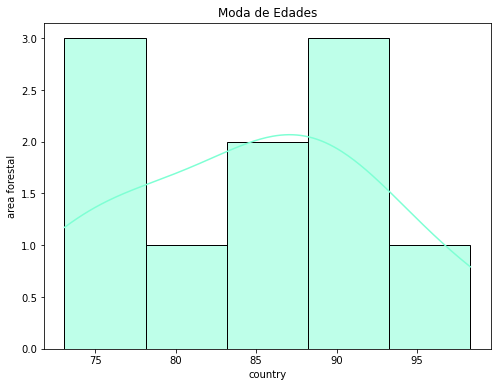

In [14]:
# Para variables numéricas (como edades, ingresos, etc.) usaremos un 'histplot()'
# Visualizar la moda de variables numéricas puede ser más desafiante, ya que la moda es un valor específico en lugar de una distribución de categorías. 

# establecemos el tamaño de la gráfica
plt.figure(figsize=(8, 6))

# creamos la gráfica usando el método 'histplot()'
sns.histplot(data=df_forestedarea,
             x='forestedarea',
             kde=True, 
             color='aquamarine')

# cambiamos el nombre del eje x
plt.xlabel('country')

# cambiamos el nombre del eje y
plt.ylabel('area forestal')

# ponemos título a la gráfica
plt.title('area forestal');